In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import datetime as dt
import yfinance as yf
import time
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import xgboost as xgb
from statsmodels.tsa.arima_model import ARIMA


In [3]:
# df = pd.read_csv("AAPL.csv")
df = yf.download("AAPL", '2000-01-01', '2023-11-30')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.847207,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.775779,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.787131,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719014,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.753073,460734400


In [6]:
df.loc[df.index>='2015-01-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.466452,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.777191,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.779421,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.112867,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.039337,237458000
...,...,...,...,...,...,...
2023-11-22,191.490005,192.929993,190.830002,191.309998,191.309998,39617700
2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300
2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600


In [24]:
ma200 = df.Close.rolling(200).mean()
ma200[int(len(ma200)*0.70):].index


DatetimeIndex(['2016-09-28', '2016-09-29', '2016-09-30', '2016-10-03',
               '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07',
               '2016-10-10', '2016-10-11',
               ...
               '2023-11-15', '2023-11-16', '2023-11-17', '2023-11-20',
               '2023-11-21', '2023-11-22', '2023-11-24', '2023-11-27',
               '2023-11-28', '2023-11-29'],
              dtype='datetime64[ns]', name='Date', length=1805, freq=None)

In [ ]:
df.info()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

In [ ]:
df.head()

In [ ]:
sample = df.groupby(pd.Grouper(key='Date',freq='M')).sum()
# pd.to_datetime(sample.index)
sample

In [9]:
# pd.to_datetime(sample.index, format="%Y-%m")
sample.index = sample.index.strftime('%Y-%w')

In [ ]:
sample

In [ ]:
sample = df.groupby(pd.Grouper(key='Date',freq='w')).sum()
# pd.to_datetime(sample.index)
# sample.index = sample.index.strftime('%Y-%U')
sample

In [ ]:
df['Date'].dt.to_period('w')

In [ ]:
df['Month_year'] = df['Date'].dt.to_period('M')
linechart = pd.DataFrame(df.groupby(df['Month_year'].dt.strftime("%Y - %b"))['Close'].sum())
linechart

In [14]:
linechart = pd.DataFrame(df.groupby(df['Month_year'])['Close'].sum())

In [ ]:
linechart.index = linechart.index.strftime('%Y-%b')
linechart

In [ ]:

df['Month_year'] = df['Date'].dt.to_period('M')
linechart = pd.DataFrame(df.groupby(df['Month_year'])['Close'].sum())
linechart.index = linechart.index.strftime('%Y-%b')
linechart.reset_index()

In [17]:
linechart = pd.DataFrame(df.groupby(df['Month_year'].dt.strftime("%Y - %b"))['Close'].sum()).reset_index()
linechart

,Month_year,Close
0,2022 - Dec,2599.290003
1,2023 - Apr,3135.870013
2,2023 - Aug,4164.930006
3,2023 - Dec,191.240005
4,2023 - Feb,2868.399996
5,2023 - Jan,2715.579989
6,2023 - Jul,3848.230011
7,2023 - Jun,3869.949998
8,2023 - Mar,3564.189988
9,2023 - May,3797.700010


In [19]:
df['Close']

0      146.630005
1      142.910004
2      140.940002
3      142.649994
4      142.160004
          ...    
245    189.789993
246    190.399994
247    189.369995
248    189.949997
249    191.240005
Name: Close, Length: 250, dtype: float64

In [20]:
print('There are {} number of days in the dataset.'.format(df.shape[0]))


There are 250 number of days in the dataset.


In [30]:
plt.figure(figsize=(14, 5), dpi=1000)
plt.plot(df['Close'], label='Amazon stock')
# plt.vlines(datetime.date(2016,4,20), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Figure 2: Aaple stock price')
plt.legend()
plt.show()

In [24]:
def get_technical_indicators(dataset): #function to generate feature technical indicators
    
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window = 7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window = 21).mean()
    
    #Create MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    
    #Create Bollinger Bands
    dataset['20sd'] = dataset['Close'].rolling(window = 20).std()
    dataset['upper_band'] = (dataset['Close'].rolling(window = 20).mean()) + (dataset['20sd']*2)
    dataset['lower_band'] = (dataset['Close'].rolling(window = 20).mean()) - (dataset['20sd']*2)
    
    #Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    #Create Momentum
    dataset['momentum'] = (dataset['Close']/100)-1
        
    return dataset

In [26]:
df1 = get_technical_indicators(df)

In [30]:
df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Month_year,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
245,2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600,2023-11,190.365714,183.001428,183.818035,187.799768,3.981733,6.922013,197.584526,169.896474,189.975860,0.8979
246,2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400,2023-11,190.464283,184.057619,184.305588,188.199803,3.894215,6.297799,197.341598,172.150402,190.258616,0.9040
247,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200,2023-11,190.418568,184.966190,184.680729,188.379833,3.699103,5.440289,196.556577,174.795422,189.666202,0.8937
248,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400,2023-11,190.204282,185.879523,185.071045,188.621396,3.550351,4.761726,195.998452,176.951547,189.855399,0.8995
249,2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300,2023-12,190.289998,186.701904,185.528005,189.024259,3.496254,4.382199,195.922897,178.394102,190.778470,0.9124


In [31]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10))
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()


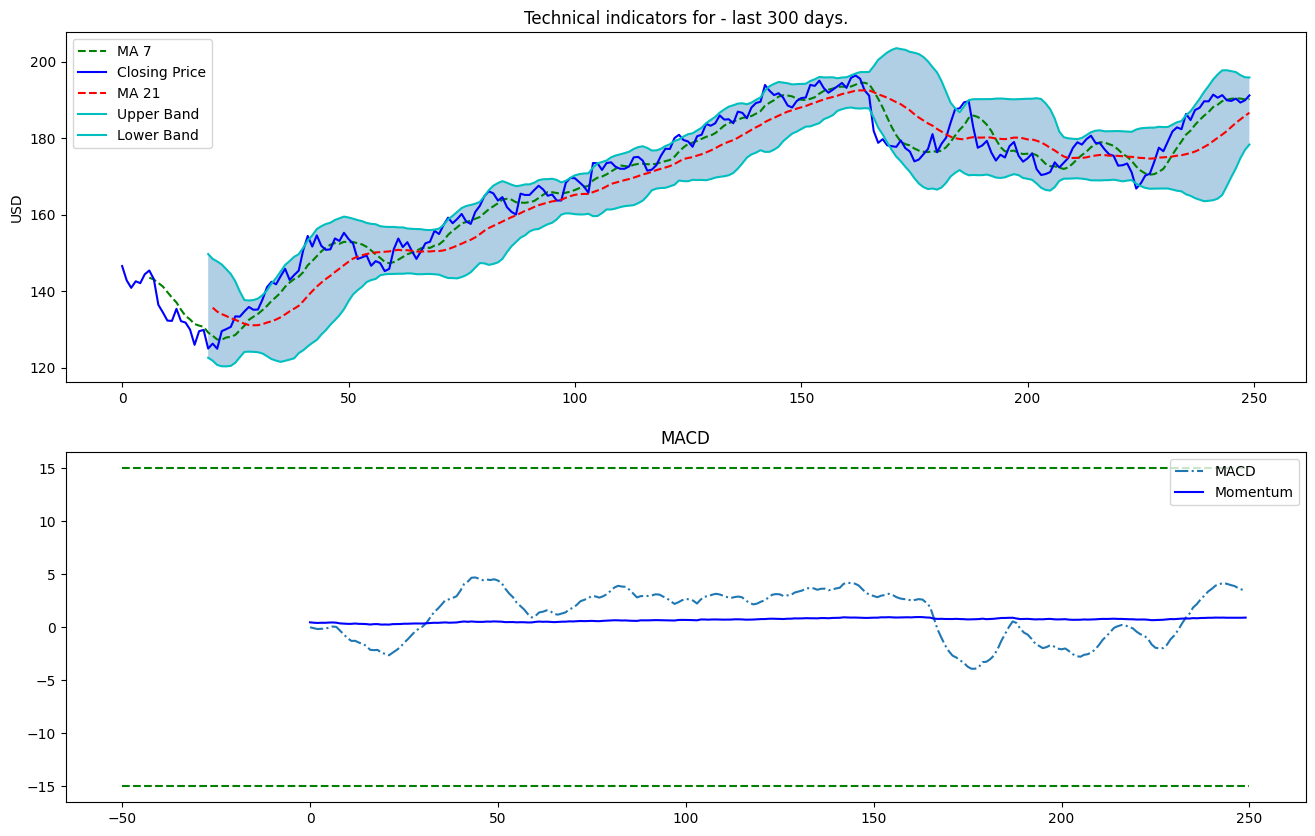

In [41]:
plot_technical_indicators(df1, 300)

In [ ]:
#fourier transformation
df_FT = df1[['Date', 'Close']]
close_fft = np.fft.fft(np.asarray(df_FT['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten


In [6]:
model = Sequential()


2023-12-05 18:31:11.098729: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [7]:
# data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
# data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

# print(data_training.shape)
# print(data_testing.shape)

(4211, 1)
(1805, 1)


In [9]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# data_training_array = scaler.fit_transform(data_training)
# data_training_array

In [47]:
x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [1]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


2023-12-05 18:29:17.471077: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 18:29:17.812553: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 18:29:17.813820: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 18:29:19.559314: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [49]:
model =Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [50]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [51]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs= 50)


Epoch 1/50
3/3 [==============================] - 6s 185ms/step - loss: 0.6406
Epoch 2/50
3/3 [==============================] - 1s 175ms/step - loss: 0.5022
Epoch 3/50
3/3 [==============================] - 1s 173ms/step - loss: 0.2218
Epoch 4/50
3/3 [==============================] - 1s 179ms/step - loss: 0.1042
Epoch 5/50
3/3 [==============================] - 1s 171ms/step - loss: 0.0422
Epoch 6/50
3/3 [==============================] - 1s 165ms/step - loss: 0.0717
Epoch 7/50
3/3 [==============================] - 1s 169ms/step - loss: 0.0435
Epoch 8/50
3/3 [==============================] - 1s 169ms/step - loss: 0.0338
Epoch 9/50
3/3 [==============================] - 1s 170ms/step - loss: 0.0434
Epoch 10/50
3/3 [==============================] - 1s 188ms/step - loss: 0.0275
Epoch 11/50
3/3 [==============================] - 1s 171ms/step - loss: 0.0235
Epoch 12/50
3/3 [==============================] - 1s 188ms/step - loss: 0.0266
Epoch 13/50
3/3 [==============================] 

In [52]:
model.save('keras_model.h5')

In [53]:
data_testing.head()


,Close
175,174.000000
176,174.490005
177,175.839996
178,177.229996
179,181.119995


In [54]:
past_100_days = data_training.tail(100)


In [56]:
final_df = pd.concat([ past_100_days,data_testing], ignore_index=True)

In [57]:
final_df.head()


,Close
0,160.250000
1,158.279999
2,157.649994
3,160.770004
4,162.360001


In [58]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.06701046],
       [0.01623724],
       [0.        ],
       [0.08041262],
       [0.12139192],
       [0.18685566],
       [0.21958771],
       [0.20567037],
       [0.15747424],
       [0.18067035],
       [0.11288672],
       [0.08118579],
       [0.06314463],
       [0.20386607],
       [0.19484568],
       [0.19536086],
       [0.22731975],
       [0.25721676],
       [0.23195874],
       [0.1899487 ],
       [0.19793834],
       [0.1577322 ],
       [0.15747424],
       [0.27731982],
       [0.3100515 ],
       [0.30773199],
       [0.28067006],
       [0.25257738],
       [0.20979377],
       [0.41030958],
       [0.40850528],
       [0.36391776],
       [0.41005162],
       [0.41494858],
       [0.38453639],
       [0.37164979],
       [0.37164979],
       [0.38762904],
       [0.44845381],
       [0.45128888],
       [0.42654644],
       [0.35850523],
       [0.36572167],
       [0.39536108],
       [0.45824736],
       [0.50644349],
       [0.50515475],
       [0.578

In [59]:
input_data.shape


(175, 1)

In [60]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(75, 100, 1)
(75,)


In [61]:
y_predicted = model.predict(x_test)


3/3 [==============================] - 1s 61ms/step


In [62]:
y_predicted.shape


(75, 1)

In [63]:
y_test

array([0.42139187, 0.43402087, 0.46881445, 0.50463919, 0.60489689,
       0.4827322 , 0.54020632, 0.580928  , 0.68221647, 0.77319582,
       0.77886594, 0.81984563, 0.82603094, 0.65103114, 0.51314439,
       0.52912364, 0.55953622, 0.4806703 , 0.42680443, 0.46623736,
       0.44742267, 0.52371148, 0.55206215, 0.45979406, 0.41958757,
       0.44175252, 0.47500017, 0.36881474, 0.32938139, 0.33608265,
       0.34948484, 0.41494858, 0.38015461, 0.41262909, 0.44484558,
       0.51134045, 0.55000024, 0.53453617, 0.57087648, 0.59433019,
       0.54639202, 0.54304138, 0.50257728, 0.46881445, 0.45902092,
       0.39252603, 0.39561868, 0.40695894, 0.34664977, 0.23814444,
       0.27242284, 0.32577314, 0.33814456, 0.4206187 , 0.51340236,
       0.48969068, 0.55618558, 0.62293843, 0.65051554, 0.63814454,
       0.74097932, 0.69974245, 0.76778365, 0.78247419, 0.82628893,
       0.82577334, 0.87113403, 0.8502578 , 0.86752581, 0.83298981,
       0.82835043, 0.8440721 , 0.81752574, 0.83247424, 0.86572

In [64]:
y_predicted

array([[0.8318451 ],
       [0.82451993],
       [0.8162917 ],
       [0.8073321 ],
       [0.79785424],
       [0.78814   ],
       [0.7783921 ],
       [0.76880294],
       [0.75956386],
       [0.75090164],
       [0.7430673 ],
       [0.73627865],
       [0.7307173 ],
       [0.7265064 ],
       [0.7235869 ],
       [0.72171503],
       [0.7205992 ],
       [0.71997505],
       [0.7195652 ],
       [0.71909314],
       [0.7183579 ],
       [0.7172163 ],
       [0.71563643],
       [0.71367073],
       [0.71134865],
       [0.7086745 ],
       [0.70566756],
       [0.7023825 ],
       [0.6988207 ],
       [0.6949519 ],
       [0.6907525 ],
       [0.6862251 ],
       [0.6814349 ],
       [0.67645377],
       [0.67137766],
       [0.66632694],
       [0.6614616 ],
       [0.6569588 ],
       [0.6529638 ],
       [0.64960337],
       [0.6469806 ],
       [0.6451267 ],
       [0.6440212 ],
       [0.6435811 ],
       [0.6436728 ],
       [0.6441438 ],
       [0.6448035 ],
       [0.645

In [65]:
scaler.scale_


array([0.02577319])

In [66]:
scale_factor = 1/0.00653061
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


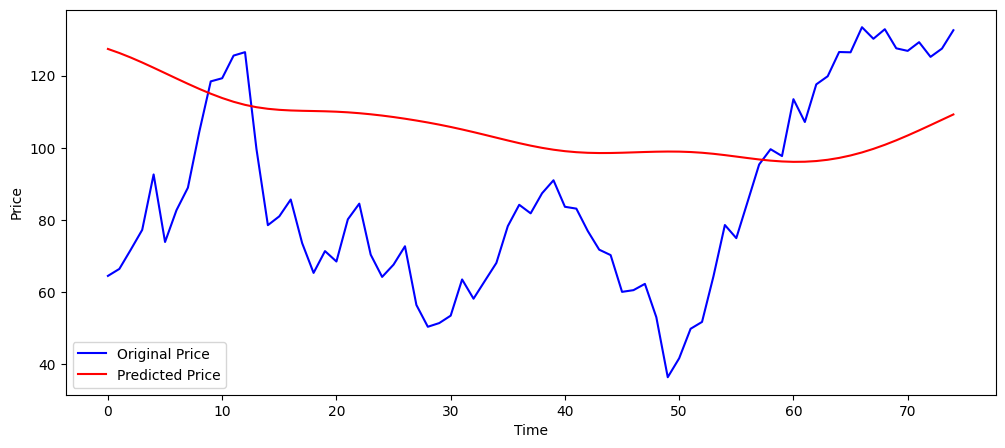

In [69]:
plt.figure(figsize=(12,5))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

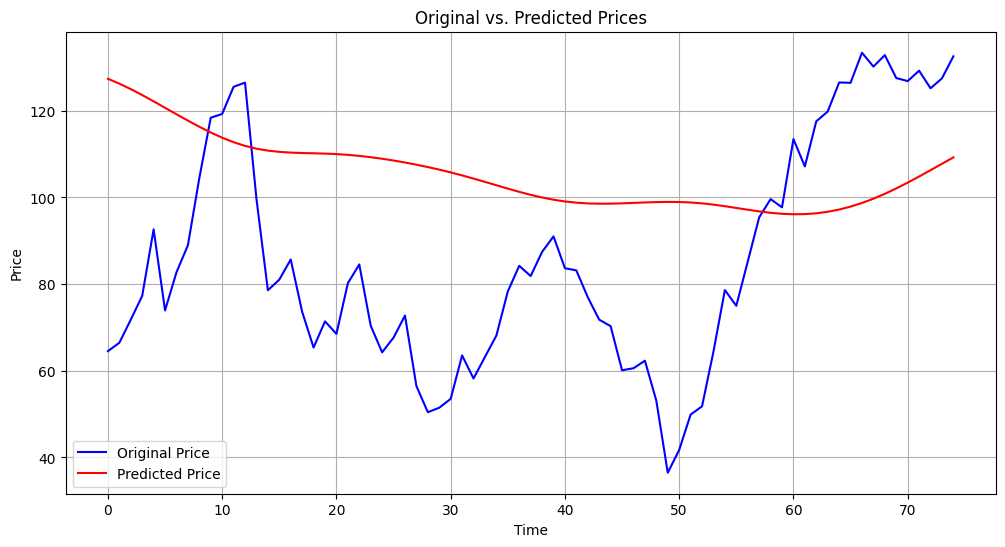

In [70]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('Original vs. Predicted Prices')  # Add a title if needed
plt.grid(True)  # Add gridlines if desired
plt.show()


In [77]:
startDate = pd.to_datetime('2000-01-01')


In [91]:
startDate.strftime("%m/%d/%Y")

'01/01/2000'

In [7]:
df = yf.download("aapl", '2000-01-01', '2023-11-30')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.847207,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.775779,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.787131,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719014,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.753073,460734400


In [8]:
px.line(df.Close, template='seaborn')

Date
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
2000-01-07           NaN
                 ...    
2023-11-22    181.574501
2023-11-24    181.560901
2023-11-27    181.540701
2023-11-28    181.537901
2023-11-29    181.545501
Name: Close, Length: 6016, dtype: float64


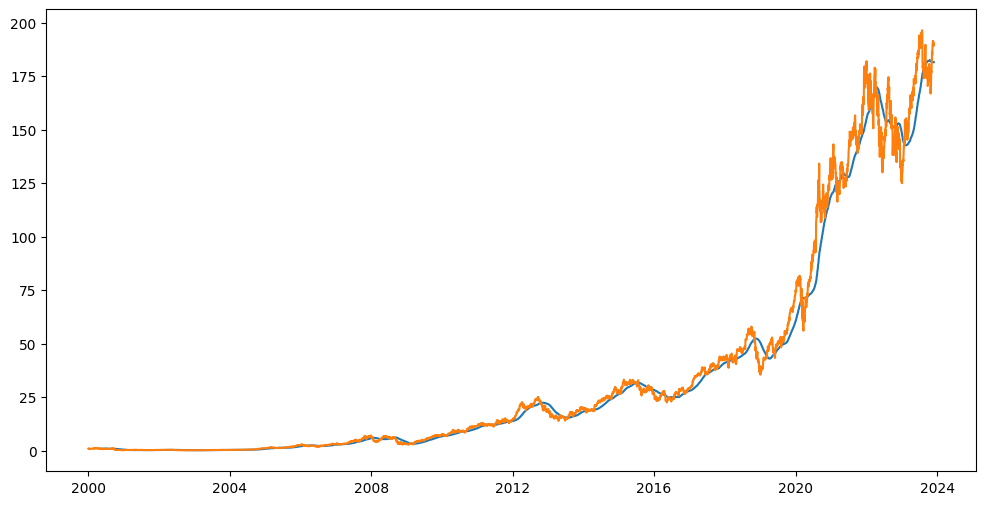

In [9]:
ma100 = df.Close.rolling(100).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(ma100)
plt.plot(df.Close)
# st.plotly_chart(fig)
print(ma100)


In [ ]:
ma200 = df.Close.rolling(200).mean()
fig = px.line(x=ma100.index, y=[ma100.values, ma200.values])
# fig.add_scatter(ma200)
fig.show()

In [17]:
fig = px.line(x=ma100.index, y=[ma100, ma200], labels={"MA100","MA200"})
fig.data[0].name="MA100"
fig.data[1].name="MA200"
fig.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .90 ))

training_data_len

5415

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data, scaled_data.shape


(array([[0.00389957],
        [0.00347012],
        [0.00353838],
        ...,
        [0.96605775],
        [0.96916657],
        [0.96391725]]),
 (6016, 1))

In [6]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.00389957, 0.00347012, 0.00353838, 0.00312884, 0.00333361,
       0.00325398, 0.00302646, 0.00277335, 0.00320847, 0.00337627,
       0.00353553, 0.00365498, 0.00397067, 0.00387113, 0.00364076,
       0.00391378, 0.00381993, 0.0038114 , 0.00343031, 0.003527  ,
       0.00336774, 0.00330232, 0.00350709, 0.0037204 , 0.00399626,
       0.00403323, 0.00393085, 0.00397067, 0.00375452, 0.00407589,
       0.00422094, 0.0039991 , 0.00403323, 0.00386828, 0.00398488,
       0.0040958 , 0.00404816, 0.00382847, 0.00395929, 0.00402186,
       0.0047357 , 0.00435745, 0.00463047, 0.00452524, 0.00439726,
       0.00435745, 0.00436882, 0.00452809, 0.00432616, 0.00400479,
       0.0040958 , 0.00433754, 0.00449396, 0.00440295, 0.00494615,
       0.00536706, 0.00523624, 0.00511679, 0.00515661, 0.0051367 ])]
[0.004991659184319]

[array([0.00389957, 0.00347012, 0.00353838, 0.00312884, 0.00333361,
       0.00325398, 0.00302646, 0.00277335, 0.00320847, 0.00337627,
       0.00353553, 0.00365498, 0.0039

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2023-12-05 19:22:15.154462: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 19:22:15.411816: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 19:22:15.413265: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 19:22:16.656544: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-05 19:22:17.862218: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-12-05 19:22:18.133059: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this do

5355/5355 [==============================] - 131s 24ms/step - loss: 7.9933e-04


In [14]:
test_data = scaled_data[training_data_len - 60: , :]
test_data[61-60:61, 0]

array([0.68600883, 0.67719202, 0.67917963, 0.67122921, 0.68335874,
       0.68539728, 0.68371545, 0.67958735, 0.67907768, 0.66878294,
       0.67428702, 0.65038478, 0.65165893, 0.66001707, 0.6624124 ,
       0.64528835, 0.64049773, 0.6244949 , 0.63570707, 0.6483462 ,
       0.64233241, 0.63509549, 0.63428008, 0.6476327 , 0.63805143,
       0.64656246, 0.64554319, 0.64528835, 0.63728695, 0.63387235,
       0.63219052, 0.63616573, 0.62841917, 0.64039578, 0.64044676,
       0.64472774, 0.64671535, 0.641517  , 0.64783657, 0.66378838,
       0.6595074 , 0.66210655, 0.6704647 , 0.66368651, 0.67306393,
       0.6816259 , 0.6801989 , 0.67872097, 0.67719202, 0.68570306,
       0.69360254, 0.69681332, 0.6983932 , 0.71210261, 0.72260125,
       0.73559717, 0.7288189 , 0.73834921, 0.73524038, 0.74105031])

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


2023-12-05 19:24:29.302173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 19:24:29.303367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 19:24:29.304798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

19/19 [==============================] - 1s 24ms/step


4.658675141821834

In [17]:
data['Predictions'] = np.nan

In [51]:
data = data.reset_index()

In [56]:
data.loc[training_data_len:,'Predictions'] = predictions

In [57]:
data.loc[training_data_len:,'Predictions']

5415    146.463928
5416    147.204712
5417    148.347000
5418    149.372330
5419    149.817795
           ...    
6011    190.491028
6012    191.048889
6013    191.228821
6014    191.179291
6015    191.137894
Name: Predictions, Length: 601, dtype: float64

/tmp/ipykernel_6962/431445187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


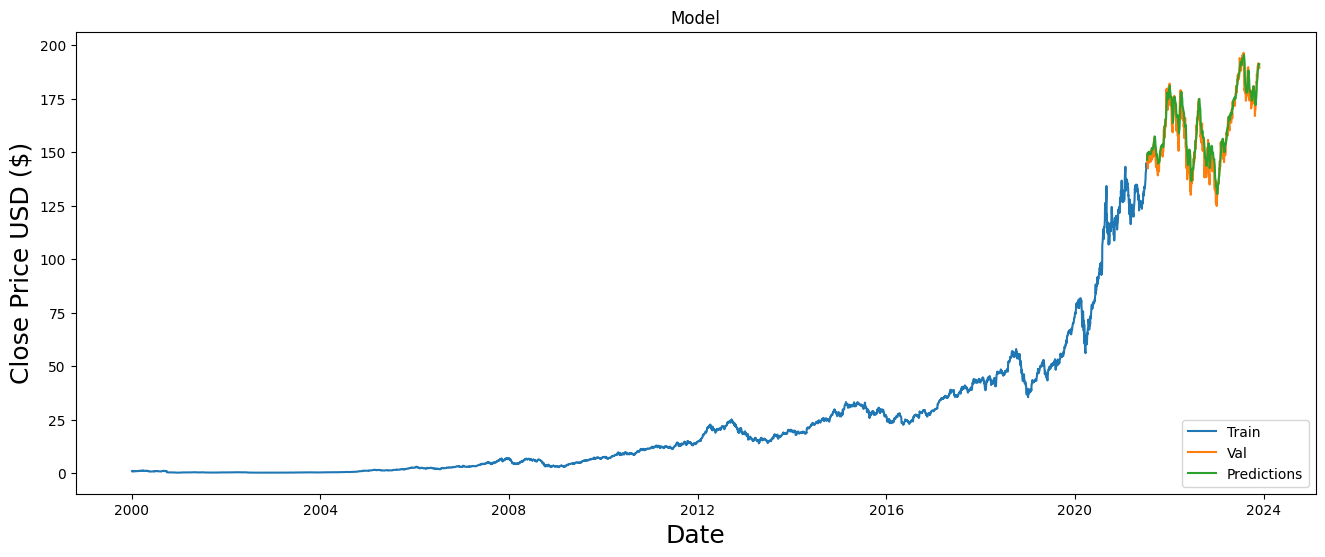

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


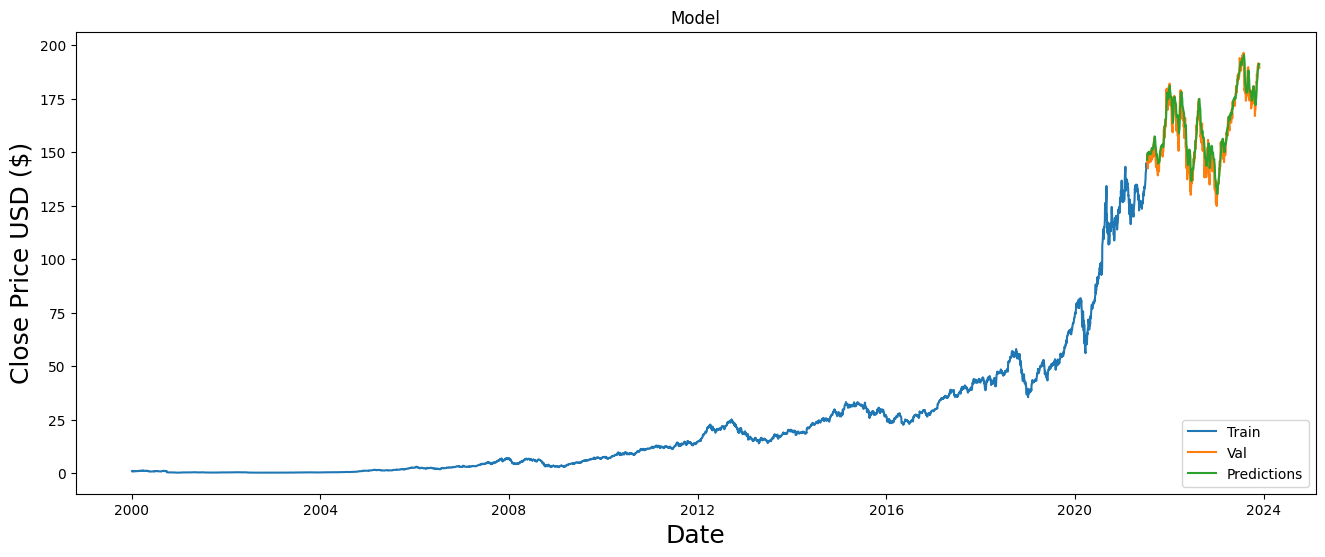

In [10]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
px.show()


In [11]:
# train['Close']
pd.DataFrame(pd.to_datetime(df.index))

,Date
0,2000-01-03
1,2000-01-04
2,2000-01-05
3,2000-01-06
4,2000-01-07
...,...
6011,2023-11-22
6012,2023-11-24
6013,2023-11-27
6014,2023-11-28


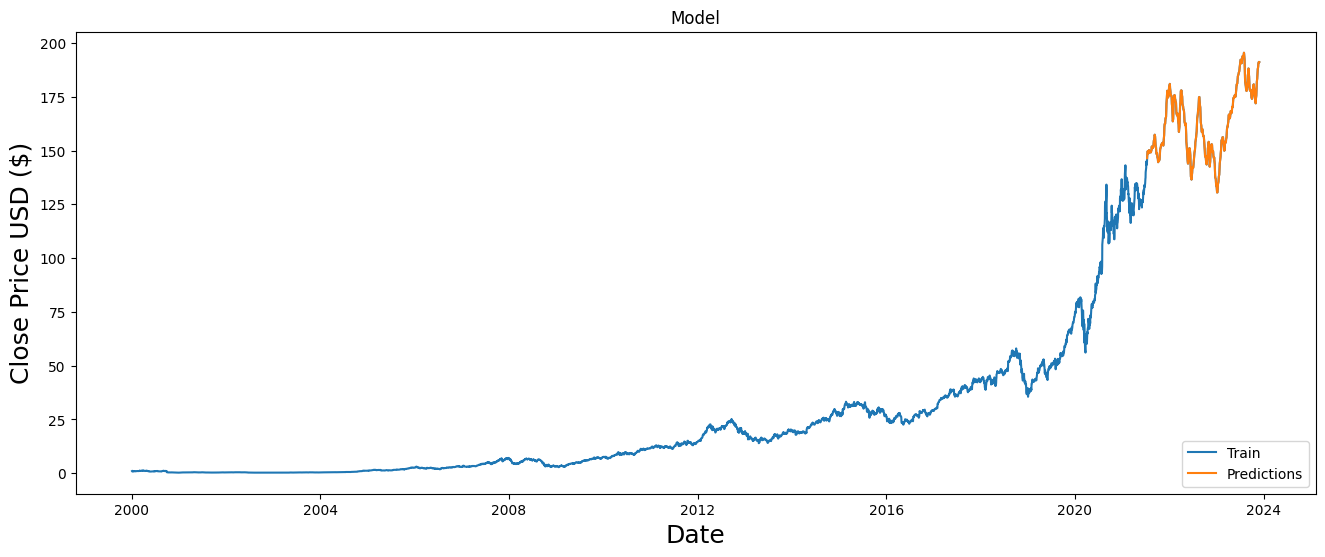

In [65]:
# # data.loc[training_data_len:,'Predictions']
# plt.figure(figsize=(16,6))
# plt.title('Model')
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Close Price USD ($)', fontsize=18)
# # plt.plot(train['Close'])
# plt.plot(data['Date'],data[['Close', 'Predictions']])
# plt.legend(['Train', 'Predictions'], loc='lower right')
# plt.show()
# # px.show()

In [69]:
data['Date']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
6011   2023-11-22
6012   2023-11-24
6013   2023-11-27
6014   2023-11-28
6015   2023-11-29
Name: Date, Length: 6016, dtype: datetime64[ns]

In [75]:
fig = px.line(x=data['Date'], y=[data['Close'],data['Predictions']])
fig.data[0].name="Training set"
fig.data[0].hovertemplate = "Training set"
fig.data[0].line.color="blue"
fig.data[1].name="Predictions"
fig.data[1].hovertemplate = "Predictions"
fig.data[1].line.color="green"
fig.show()


In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


NameError: name 'df' is not defined